# Generalizing beyond the obvious symmetries: quasi-crystals
Author: [Tobias A. de Jong](https://github.com/TAdeJong)

When using `anylattice_gen()`, we can choose any rotational symmetry. This generalizes beyond just 2-fold, 4-fold and 3/6-fold symmetry. So let's see what happens if we use 5, or 7, rotational symmetries were no periodic lattice / covering of the plane exists... Some pretty wild patterns might appear!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as itert

import ipywidgets as widgets

import dask.array as da

from latticegen import anylattice_gen, generate_ks, combine_ks
from latticegen.transformations import *
from dask.distributed import Client, LocalCluster

import colorcet as cc

In [2]:
# Create a dask cluster for parallel computation. Settings optimized to play nice with mybinder.org
cluster = LocalCluster(n_workers=1, threads_per_worker=4, memory_limit='2GB')  
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:40397 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 4 Memory: 2.00 GB


In [2]:
S = 250  #Half size of visualization in pixels. Optimized for interactive rendering on mybinder.
r_k = 0.2
t0 = np.deg2rad(15)
k0 = r_k*np.array([np.cos(t0), np.sin(t0)])
a_0 = 1  # Let's not pretend these represent atoms anymore...

In [3]:
sym = 5
order = 2

def plot(sym=5):
    "Make a plot of a second lattice rotated by `theta` degrees on top of `iterated1`"
    fig, ax = plt.subplots(figsize=[10,10])
    data = anylattice_gen(r_k, 0, order, symmetry=sym, size=S).compute()
    im = ax.imshow(data.T, cmap='cet_fire_r', extent=[-S*r_k*a_0, S*r_k*a_0, S*r_k*a_0, -S*r_k*a_0], 
                   vmax=np.quantile(data,0.99),
                   vmin=np.quantile(data,0.01),
                  )
    ax.set_title(f'symmetry = {sym}')

widgets.interactive(plot, 
    sym=widgets.IntSlider(value=5, min=2, max=11, continuous_update=False),
   )

interactive(children=(IntSlider(value=5, continuous_update=False, description='sym', max=11, min=2), Output())…

The 8-fold and 9-fold symmetric patterns are actually closely related to moiré patterns...

Now we can of course also explore what influence the order parameter has on the patterns. (This is due how the basis vectors are combined. Checkout `combine_ks()` to see how.)

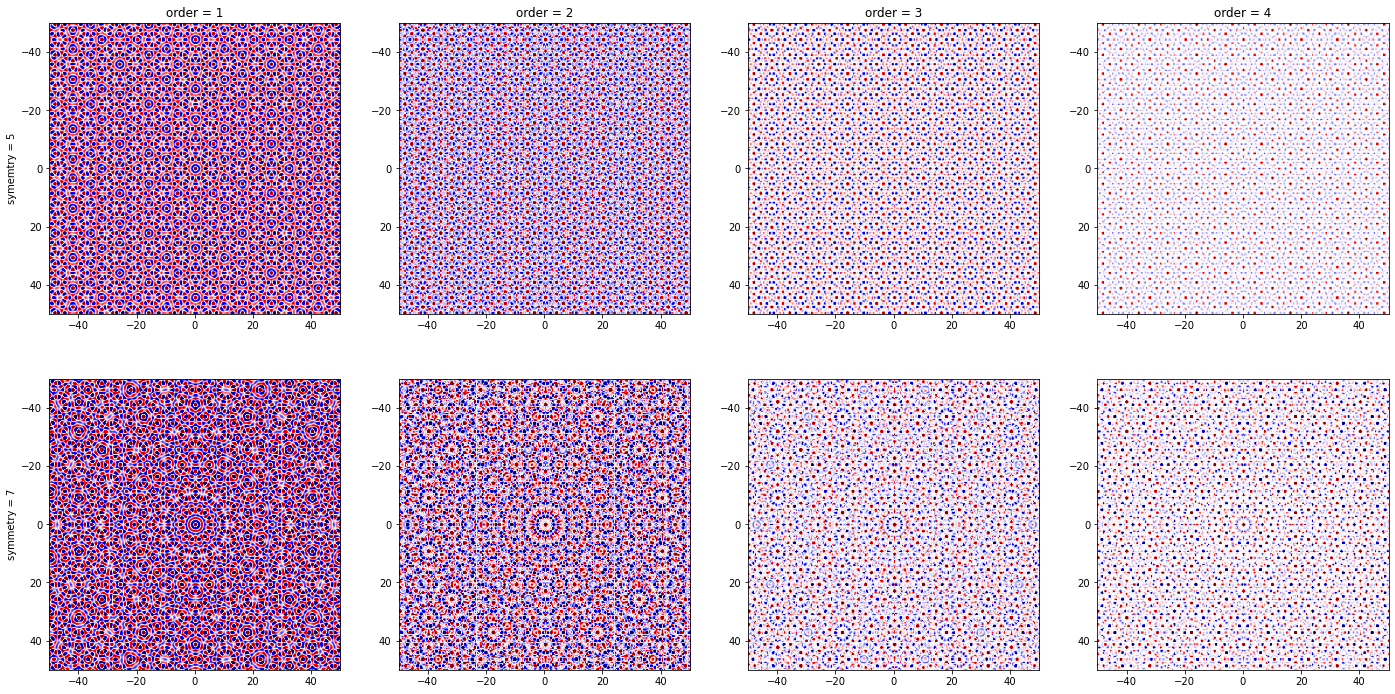

In [4]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=[24,12])
for i in np.arange(1,5):
    data = anylattice_gen(r_k, 0, i, symmetry=5, size=S).compute()
    mean = data.mean()
    dv = max(data.max()-np.quantile(data,0.99),data.mean()-np.quantile(data,0.01))
    im = ax[0, i-1].imshow(data.T, cmap='seismic', extent=[-S*r_k*a_0, S*r_k*a_0, S*r_k*a_0, -S*r_k*a_0], 
                   vmax=mean+dv, vmin=mean-dv,
                  )
    ax[0, 0].set_ylabel('symemtry = 5')
    ax[0, i-1].set_title(f'order = {i}')
    data = anylattice_gen(r_k, 0, i, symmetry=7, size=S).compute()
    im = ax[1, i-1].imshow(data.T, cmap='seismic', extent=[-S*r_k*a_0, S*r_k*a_0, S*r_k*a_0, -S*r_k*a_0], 
               vmax=mean+dv, vmin=mean-dv,
              )
    ax[1,0].set_ylabel('symmetry = 7')